**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_ANNOT  = "region.annotation.genome_tss.tsv"
TXT_FNAME_REGION = "K562.hg38.TSS.selected_by_highest_Pol2_signal.tsv"
#TXT_FNAME_REGION = "K562.hg38.TSS.selected_by_highest_Pol2_signal.filtered_by_RNAseq_TPM.tsv"

TXT_TSS_ANNOT   = "genome_tss_pol2" 
TXT_TSS_LABEL   = "TSS_Pol2"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_tss.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.genome_tss.tsv 


## Import data

**Read region annotation**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_ANNOT
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 16109    11

$fcc_astarr_macs_input_union
[1] 17697    11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Group,Label,Region_Annot,Region_Count,Essential
chr1,17288,17689,chr1:17288-17689,fcc_astarr_macs_input_overlap,genome_tss_pol2,TSS_Pol2,MIR6859-1,chr1:17436-17437,1,FALSE
chr1,17288,17689,chr1:17288-17689,fcc_astarr_macs_input_overlap,genome_tss_pol2,TSS_Pol2,MIR6859-2,chr1:17436-17437,1,FALSE
chr1,17288,17689,chr1:17288-17689,fcc_astarr_macs_input_overlap,genome_tss_pol2,TSS_Pol2,MIR6859-3,chr1:17436-17437,1,FALSE


**Region TSS proximity**

In [6]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_closest", txt_folder, "summary")
    txt_fname = "region.summary.genome_tss.tss_proximity.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_dist_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 304915     11

$fcc_astarr_macs_input_union
[1] 499336     11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Region_TSS,Score_Pol2,Gene,Distance2TSS,TSS_Proximity
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,1469,Proximal
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,chr1:29370-29371,0.00023,WASH7P,18966,Distal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,2409,Distal


**Import GC content**

In [7]:
lst = list(
    "fcc_astarr_macs_input_overlap" = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.tsv",
    "fcc_astarr_macs_input_union"   = "K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.tsv"
    
)
lst = lapply(lst, function(txt_fname){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_nuc", "fcc_astarr_macs", "summary")
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_nuc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      6

$fcc_astarr_macs_input_union
[1] 246852      6



Chrom,ChromStart,ChromEnd,Region,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.587859,313


**import region**

In [8]:
### set file directory
txt_fdiry = file.path(FD_RES, "region", "genome_tss", "summary")
txt_fname = TXT_FNAME_REGION
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_original = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 29330     8


Chrom,ChromStart,ChromEnd,Region,Gene,Score,Group,Label
chr1,11873,11874,chr1:11873-11874,DDX11L1,0.00023,TSS_Pol2,DDX11L1
chr1,17436,17437,chr1:17436-17437,MIR6859-1,9.43812,TSS_Pol2,MIR6859-1
chr1,17436,17437,chr1:17436-17437,MIR6859-2,9.43812,TSS_Pol2,MIR6859-2


## Arrange table

**Arrange annotation**

In [31]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::mutate(TSS = 1) %>% 
        dplyr::select(Region, TSS) %>% 
        dplyr::distinct()
    return(dat)
})

### assign and show
lst_dat_region_annot_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 13732     2

$fcc_astarr_macs_input_union
[1] 15182     2



Region,TSS
chr1:17288-17689,1
chr1:28934-29499,1
chr1:778233-779389,1


**Select TSS for proximity**

In [30]:
lst = lst_dat_region_dist_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Annotation_B == TXT_TSS_ANNOT)
    dat = dat %>% 
        dplyr::select(Region, Distance2TSS, TSS_Proximity) %>% 
        dplyr::distinct()
    return(dat)
})

### assign and show
lst_dat_region_dist_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      3

$fcc_astarr_macs_input_union
[1] 246852      3



Region,Distance2TSS,TSS_Proximity
chr1:10038-10405,1469,Proximal
chr1:14282-14614,2409,Distal
chr1:16025-16338,1099,Proximal


**Arrange and join the tables**

In [32]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_annot = lst_dat_region_annot_arrange[[txt_folder]]
    dat_region_dist  = lst_dat_region_dist_arrange[[txt_folder]]
    dat_region_nuc   = lst_dat_region_nuc_import[[txt_folder]]

    ### join the arranged table with GC content
    dat = dat_region_nuc
    dat = dat %>%
        dplyr::left_join(dat_region_dist,  by = "Region") %>%
        dplyr::left_join(dat_region_annot, by = "Region") %>%
        replace(is.na(.), 0) %>%
    return(dat)
})

### assign and show
lst_dat_region_annot_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      9

$fcc_astarr_macs_input_union
[1] 246852      9



Chrom,ChromStart,ChromEnd,Region,pGC,Length,Distance2TSS,TSS_Proximity,TSS
chr1,10038,10405,chr1:10038-10405,0.523161,367,1469,Proximal,0
chr1,14282,14614,chr1:14282-14614,0.578313,332,2409,Distal,0
chr1,16025,16338,chr1:16025-16338,0.587859,313,1099,Proximal,0


**Check**

In [33]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){table(dat$Group)})
print(lst)

$fcc_astarr_macs_input_overlap

TSS_Pol2 
   16109 

$fcc_astarr_macs_input_union

TSS_Pol2 
   17697 



## Explore: Count table

**Total peaks**

In [34]:
dat = dat_region_original
dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()

res = table(dat$Group, dnn = "Group")
dat = as.data.frame(res)

dat_region_peak_count = dat
fun_display_table(dat)

Group,Freq
TSS_Pol2,28563


**Count ATAC regions annotated**

In [35]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()
    res = table(dat$Group, dnn = "Group")
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Region")

### assign and show
dat_region_annot_count = dat
fun_display_table(dat)

Region,Group,Freq
fcc_astarr_macs_input_overlap,TSS_Pol2,13732
fcc_astarr_macs_input_union,TSS_Pol2,15182


**Summarize**

In [36]:
tmp = dat_region_peak_count
tmp = tmp %>% dplyr::mutate(Freq = scales::comma(Freq))
colnames(tmp) = c("Group", "Location (Total)")

dat = dat_region_annot_count
dat = dat %>% 
    dplyr::mutate(Region = fun_str_map_atac(Region)) %>%
    dplyr::mutate(Freq   = scales::comma(Freq)) %>%
    tidyr::spread(Region, Freq)

dat = tmp %>% dplyr::right_join(dat, by = "Group")
dat %>% kableExtra::kable("markdown")



|Group    |Location (Total) |ATAC (Overlap) |ATAC (Union) |
|:--------|:----------------|:--------------|:------------|
|TSS_Pol2 |28,563           |13,732         |15,182       |

## GC content and region length distribution

**Set plot style**

In [37]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16)
)

### set color
vec_txt_color  = c("TSS-Overlapped" = "#fb8072", "Not-Overlapped" = "grey50")
theme_color = scale_fill_manual(values = vec_txt_color)

### set factor order
vec_txt_direct = c("TSS-Overlapped", "Not-Overlapped")

**Distribution of GC content**

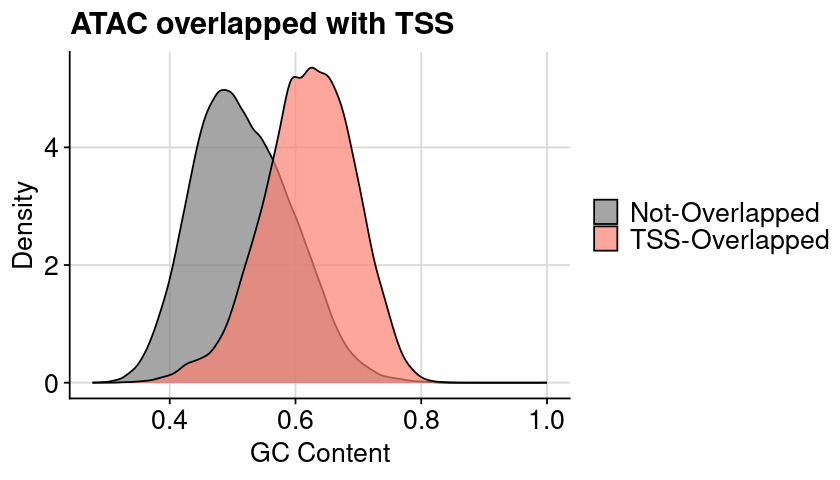

In [38]:
### get table and set factor
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(TSS, "TSS-Overlapped", "Not-Overlapped")) %>%
    dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_direct)))

### generate plot
gpt = ggplot(dat, aes(x=pGC, fill=Label)) + 
    geom_density(alpha = 0.7) + 
    theme_cowplot() + 
    background_grid() +
    theme_color +
    theme_text +
    labs(x = "GC Content", y = "Density", title = "ATAC overlapped with TSS")

### assign and show
gpt_export_nuc = gpt
options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

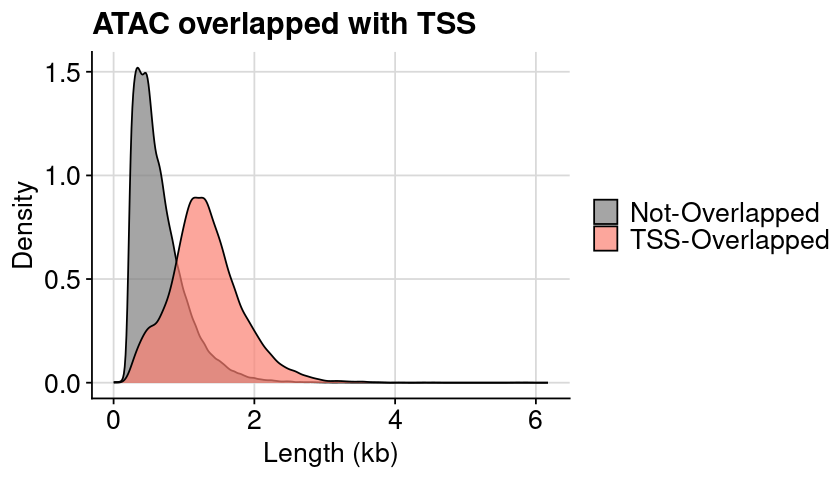

In [39]:
### get table and set factor
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% 
    dplyr::mutate(Label = ifelse(TSS, "TSS-Overlapped", "Not-Overlapped")) %>%
    dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_direct)))

### generate plot
gpt = ggplot(dat, aes(x=Length/1000, fill=Label)) + 
    geom_density(alpha = 0.7) + 
    theme_cowplot() + 
    background_grid() +
    theme_color +
    theme_text +
    labs(x = "Length (kb)", y = "Density", title = "ATAC overlapped with TSS")

### assign and show
gpt_export_length = gpt
options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

**Save plots**

In [40]:
plt_export = gpt_export_nuc
txt_export = "fig.region_annot.astarr_input_overlap.genome_tss.distribution.gc_content"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

In [41]:
plt_export = gpt_export_length
txt_export = "fig.region_annot.astarr_input_overlap.genome_tss.distribution.length"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

## Sanity check

**Check**

In [42]:
for (txt_folder in VEC_TXT_FOLDER){
    cat("Region:", txt_folder, "\n")
    dat_region_annot = lst_dat_region_annot_arrange[[txt_folder]]
    dat_region_dist  = lst_dat_region_dist_arrange[[txt_folder]]
    dat_region_nuc   = lst_dat_region_nuc_import[[txt_folder]]
    cat("Check:", all(dat_region_annot$Region %in% dat_region_nuc$Region), "\n")
    cat("Check:", all(dat_region_nuc$Region == dat_region_dist$Region),    "\n")
}

Region: fcc_astarr_macs_input_overlap 
Check: TRUE 
Check: TRUE 
Region: fcc_astarr_macs_input_union 
Check: TRUE 
Check: TRUE 


**Check: TSS proximity and TSS overlap: Overlapped with TSS <-> Distance to TSS == 0**

In [43]:
for (txt_folder in VEC_TXT_FOLDER){
    cat("Region:", txt_folder, "\n")
    dat = lst_dat_region_annot_arrange[[txt_folder]]
    
    ### check missing values
    cat("Missing?", any(is.na(dat)), "\n")
    cat("\n")
    
    ### check TSS annotation and distance
    cat("If D==0:", "\n")
    tmp = dat %>% 
        dplyr::filter(Distance2TSS == 0) %>%
        dplyr::mutate(Note = ifelse(TSS == 1, "TSS==1", "TSS!=1"))
    res = table(tmp$Note)
    print(res)
    cat("\n")
    
    cat("If TSS==1:", "\n")
    tmp = dat %>% 
        dplyr::filter(TSS == 1) %>% 
        dplyr::mutate(Note = ifelse(Distance2TSS == 0, "D==0", "D>0"))
    res = table(tmp$Note)
    print(res)
    cat("\n")
}

Region: fcc_astarr_macs_input_overlap 
Missing? FALSE 

If D==0: 

TSS==1 
 13732 

If TSS==1: 

 D==0 
13732 

Region: fcc_astarr_macs_input_union 
Missing? FALSE 

If D==0: 

TSS==1 
 15182 

If TSS==1: 

 D==0 
15182 

